   Message_ID                                       Message_Text  \
0           1     schedule call me schedule documents assignment   
1           2  bank alert investment scheme claim now bank al...   
2           3  documents dinner project update assignment inv...   
3           4                      dinner project update meeting   
4           5                schedule family trip project update   

  Caller_Location  Is_Fraud Communication_Type  Duration_Seconds  
0           Noida         0                SMS                 0  
1          Mumbai         1                SMS                 0  
2          Mumbai         0                SMS                 0  
3          Mumbai         0                SMS                 0  
4           Noida         0                SMS                 0  

-- Metrics --
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


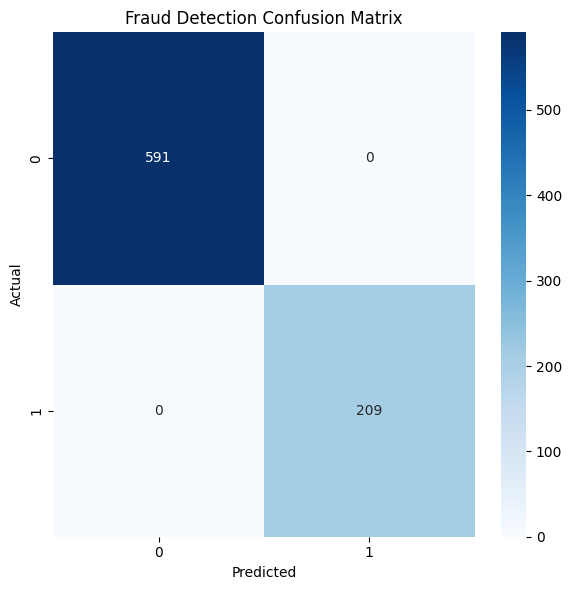

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df = pd.read_csv("fraud_detection_dataset_2000.csv")
print(df.head())

# Remove useless column
df = df.drop(columns=["Message_ID"])

# Encode categorical columns
le_loc = LabelEncoder()
le_type = LabelEncoder()

df["Caller_Location"] = le_loc.fit_transform(df["Caller_Location"])
df["Communication_Type"] = le_type.fit_transform(df["Communication_Type"])

# Convert text into TF-IDF numerical features
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(df["Message_Text"]).toarray()

# Combine all features
X_other = df[["Caller_Location", "Communication_Type", "Duration_Seconds"]].values
X = np.hstack((X_text, X_other))

y = df["Is_Fraud"]

# Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

# Scale ONLY numeric columns (last 3 columns)
scaler = StandardScaler()
x_train[:, -3:] = scaler.fit_transform(x_train[:, -3:])
x_test[:, -3:] = scaler.transform(x_test[:, -3:])

# Train Model
model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Metrics
print("\n-- Metrics --")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Fraud Detection Confusion Matrix")
plt.tight_layout()
plt.show()
